<a href="https://colab.research.google.com/github/adag21044/HateSpeechAnalysis/blob/main/NLP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd # pd instance
import re  # Importing regular expressions module
import numpy as np #np
from nltk.stem import SnowballStemmer
import IPython

In [2]:
file_path = "HateSpeechDetection.csv"
data = pd.read_csv(file_path)

In [3]:
# Initialize Snowball Stemmer
stemmer = SnowballStemmer("english")

In [4]:
# Function for text preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = ' '.join([stemmer.stem(word) for word in text.split()])  # Apply stemming
    return text

In [8]:
# Apply preprocessing to the 'Comment' column
data["Comment"] = data["Comment"].apply(preprocess_text)

In [9]:
# Save the processed data to a CSV file
preprocessed_file_path = "preprocess.csv"
data.to_csv(preprocessed_file_path, index=False)

In [16]:
print(f"Preprocessed data has been saved to 'preprocess.csv'.")
IPython.display.display(data)  # This will show the entire dataframe in Colab
display(data.head())  # Show first 5 rows

Preprocessed data has been saved to 'preprocess.csv'.


,Platform,Comment,Hateful
0,Reddit,damn i thought they had strict gun law in germani,0
1,Reddit,i dont care about what it stand for or anyth i...,0
2,Reddit,it not a group it an idea lol,0
3,Reddit,so it not just america,0
4,Reddit,the dog is a spectacular dancer consid he has ...,0
...,...,...,...
2995,4Chan,this is what kike shill look like ryan has don...,1
2996,4Chan,not bait theyr right,0
2997,4Chan,i like this one a lot,0
2998,4Chan,kike make money off heroin what new,1


,Platform,Comment,Hateful
0,Reddit,damn i thought they had strict gun law in germani,0
1,Reddit,i dont care about what it stand for or anyth i...,0
2,Reddit,it not a group it an idea lol,0
3,Reddit,so it not just america,0
4,Reddit,the dog is a spectacular dancer consid he has ...,0


In [17]:
# Display the dataset using Google Colab's interactive table
from google.colab import data_table # Import data_table for better visualization
data_table.DataTable(data) # Display the dataset as an interactive table in Colab

,Platform,Comment,Hateful
0,Reddit,damn i thought they had strict gun law in germani,0
1,Reddit,i dont care about what it stand for or anyth i...,0
2,Reddit,it not a group it an idea lol,0
3,Reddit,so it not just america,0
4,Reddit,the dog is a spectacular dancer consid he has ...,0
...,...,...,...
2995,4Chan,this is what kike shill look like ryan has don...,1
2996,4Chan,not bait theyr right,0
2997,4Chan,i like this one a lot,0
2998,4Chan,kike make money off heroin what new,1


In [34]:
import pandas as pd  # Import pandas for data handling
import re  # Importing regular expressions module
import numpy as np  # Import NumPy for array operations
from nltk.stem import SnowballStemmer, LancasterStemmer, WordNetLemmatizer
from IPython.display import display  # Corrected display function
import nltk

# Ensure necessary NLTK data is available for lemmatization
nltk.download("wordnet")
nltk.download("omw-1.4")

# Load the dataset
file_path = "HateSpeechDetection.csv"
data = pd.read_csv(file_path)

# Initialize different stemmers and lemmatizer
stemmers = {
    "snowball": SnowballStemmer("english"),
    "lancaster": LancasterStemmer(),
}
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing with different options
def preprocess_text(text, method="snowball"):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
        words = text.split()

        # Apply the selected stemming/lemmatization method
        if method == "snowball":
            processed_words = [stemmers["snowball"].stem(word) for word in words]
        elif method == "lancaster":
            processed_words = [stemmers["lancaster"].stem(word) for word in words]
        elif method == "lemmatization":
            processed_words = [lemmatizer.lemmatize(word) for word in words]
        else:
            processed_words = words  # No processing if method is unknown

        return " ".join(processed_words), " ".join(processed_words[:2])  # First 2 words as separate feature
    return "", ""

# Add test cases for different languages
test_samples = pd.DataFrame({
    "Platform": ["Test"] * 6,
    "Comment": [
        "I love all people regardless of their background.",  # English - Non-hateful (Expected: 0)
        "I hate you and everyone like you!",  # English - Hateful (Expected: 1)
        "Ich respektiere alle Kulturen und Menschen.",  # German - Non-hateful (Expected: 0)
        "Ich hasse alle Menschen mit dieser Hautfarbe!",  # German - Hateful (Expected: 1)
        "أنا أؤمن بأن الجميع يجب أن يعاملوا بالمساواة.",  # Arabic - Non-hateful (Expected: 0)
        "يجب القضاء على هؤلاء الناس!",  # Arabic - Hateful (Expected: 1)
    ],
    "Hateful": [0, 1, 0, 1, 0, 1]
})

# Append test cases to the dataset
data = pd.concat([data, test_samples], ignore_index=True)

# Apply text preprocessing
processed_comments = []
word_features = []

for comment in data["Comment"]:
    processed, words_2_features = preprocess_text(comment, method="lemmatization")  # Change to "lancaster" or "snowball" if needed
    processed_comments.append(processed)
    word_features.append(words_2_features)

# Add new processed features
data["Processed_Comment"] = processed_comments
data["Word_Feature"] = word_features  # First two words as a separate feature

# Save processed data
preprocessed_file_path = "preprocess.csv"
data.to_csv(preprocessed_file_path, index=False)

# Display the processed data
display(data.tail(10))  # Show last 10 rows


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Platform,Comment,Hateful,Processed_Comment,Word_Feature
2996,4Chan,"Not bait, they're right",0,not bait theyre right,not bait
2997,4Chan,I like this one a lot.,0,i like this one a lot,i like
2998,4Chan,Kikes making money off heroin what’s new,1,kike making money off heroin whats new,kike making
2999,4Chan,"Desecrate men by making them gay/trannies, and...",1,desecrate men by making them gaytrannies and w...,desecrate men
3000,Test,I love all people regardless of their background.,0,i love all people regardless of their background,i love
3001,Test,I hate you and everyone like you!,1,i hate you and everyone like you,i hate
3002,Test,Ich respektiere alle Kulturen und Menschen.,0,ich respektiere alle kulturen und menschen,ich respektiere
3003,Test,Ich hasse alle Menschen mit dieser Hautfarbe!,1,ich hasse alle menschen mit dieser hautfarbe,ich hasse
3004,Test,أنا أؤمن بأن الجميع يجب أن يعاملوا بالمساواة.,0,أنا أؤمن بأن الجميع يجب أن يعاملوا بالمساواة,أنا أؤمن
3005,Test,يجب القضاء على هؤلاء الناس!,1,يجب القضاء على هؤلاء الناس,يجب القضاء


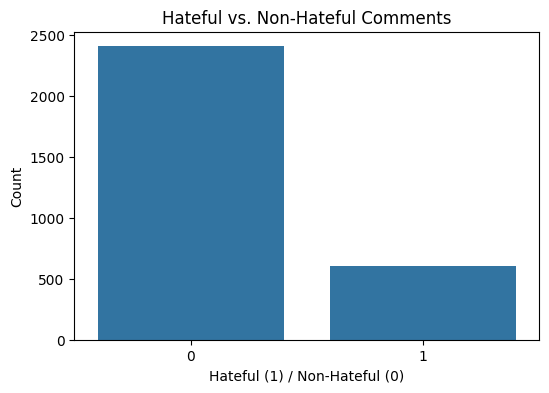

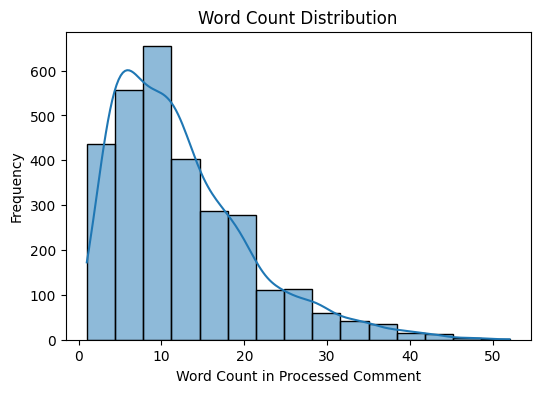

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for hateful vs. non-hateful comments
plt.figure(figsize=(6, 4))
sns.countplot(x="Hateful", data=data)
plt.title("Hateful vs. Non-Hateful Comments")
plt.xlabel("Hateful (1) / Non-Hateful (0)")
plt.ylabel("Count")
plt.show()

# Word count distribution
data["Word_Count"] = data["Processed_Comment"].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
sns.histplot(data["Word_Count"], bins=15, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count in Processed Comment")
plt.ylabel("Frequency")
plt.show()
